# Work 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test4 = df.copy()

In [5]:
#correcting the spelling in investors name ignoring undisclosed investors


test4['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test4['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [6]:
temp = test4['InvestorsName'].value_counts()
temp.index

Index(['', 'Indian Angel Network', 'Ratan Tata', 'Kalaari Capital',
       'Group of Angel Investors', 'Sequoia Capital', 'undisclosed investors',
       'Brand Capital', 'RoundGlass Partners', 'Undisclosed Investor',
       ...
       'Sequoia Capital, Tree Line Asia, Innoven Capital',
       'Shruth & Smith Group, Hermes Group',
       'WRV Capital and IndusAge Partners, Infosys Innovation Fund',
       'Kashyap Deorah, Rajul Garg, Maninder Gulati',
       'AVG Group, 500 Startups', 'Verlinvest, DSG Consumer Partners',
       'Fidelity Growth Partners, Fidelity Biosciences',
       'IDG Ventures, Accel Partners', 'Accel Partners India, RB Investments',
       'Kludein LLCPhanindra Sama, Narayan Ramachandran, Pranav Pai'],
      dtype='object', length=1884)

In [7]:
#correcting major startup names

test4['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test4['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test4['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test4['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Olacabs", "Ola", inplace = True)
test4['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test4['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [8]:
temp3 = test4['StartupName'].value_counts()
temp3.index

Index(['Ola', 'Swiggy', 'Paytm', 'Oyo', 'UrbanClap', 'NoBroker', 'Flipkart',
       'Medinfi', 'Jugnoo', 'Moglix',
       ...
       'Fractal Analytics', 'Design Cafe', 'FindmeaShoe', 'MuhurtMaza',
       'Sokrati', 'Big Fish Ventures', 'Zopper', 'Playment', 'Gomalon',
       'EveningFlavors'],
      dtype='object', length=1993)

In [9]:
temp3a = test4['InvestmentType'].value_counts()
temp3a.index

Index(['Seed Funding', 'Private Equity', 'SeedFunding', 'PrivateEquity',
       'Crowd funding', 'Crowd Funding', 'Debt Funding'],
      dtype='object')

In [10]:
#correcting spelling of investment type
test4['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test4['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test4['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [11]:
#filter na 
test4.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test4.reset_index(inplace = True, drop = True)

# Function To Solve the Problem

In [12]:
def create(startup_name, Investor_Name, Investment_Type):
    cnt = {}
    name_startup = {}
    
    Desired_Investment_Type = ["Crowd Funding", "Seed Funding"]
    
    n = len(Investor_Name)
    for index in range(n):
        
        if Investment_Type[index].strip() not in Desired_Investment_Type:
            continue
            
        i = Investor_Name[index].strip()
        name = startup_name[index].strip()
        
        if "," not in i and i!='':
            if name_startup.get(i) is None:
                cnt[i] = 1
                li =[]
                li.append(name)
                name_startup[i] = li
                
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i] = cnt.get(i,0) + 1
                    li.append(name)
                    name_startup[i] = li
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != '':
                    
                    if name_startup.get(k) is None:
                        cnt[k] = 1
                        li =[]
                        li.append(name)
                        name_startup[k] = li
                
                    else:
                        li = name_startup[k]
                        if name not in li:
                            cnt[k] = cnt.get(k,0) + 1
                            li.append(name)
                            name_startup[k] = li

                
    return cnt

In [14]:
dictionary = create(test4['StartupName'],test4['InvestorsName'],test4['InvestmentType']) 


In [15]:
different_invest = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))


In [16]:
different_invest = different_invest.sort_values(by = [0], ascending = False)
different_invest

,0
Indian Angel Network,33
Rajan Anandan,23
LetsVenture,16
Anupam Mittal,16
Group of Angel Investors,14
...,...
Mohit Lalvani,1
Kamal Puri,1
Vineet Taneja,1
Rohit Chokhani,1


In [18]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(different_invest.index[i])
    y.append(different_invest.values[i][0])
y    

[33, 23, 16, 16, 14]

In [19]:
x

['Indian Angel Network',
 'Rajan Anandan',
 'LetsVenture',
 'Anupam Mittal',
 'Group of Angel Investors']

In [20]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is either Seed funding or Crowd funding
print("List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :
1. Indian Angel Network
2. Rajan Anandan
3. LetsVenture
4. Anupam Mittal
5. Group of Angel Investors


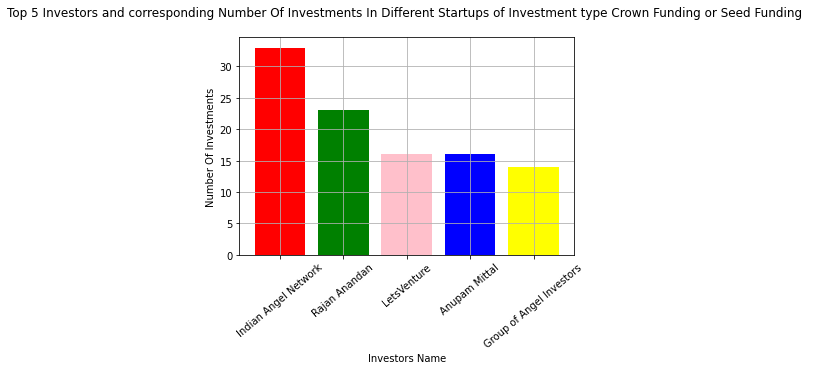

In [24]:
#plot
plt.bar(x, y, color = ['red','green','pink','blue','yellow'])
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Crown Funding or Seed Funding \n")
plt.show()

In [25]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding

li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Seed funding or Crowd funding"])
investor_data

,Name Of Investors,Total Number Of Investments of type Seed funding or Crowd funding
0,Indian Angel Network,33
1,Rajan Anandan,23
2,LetsVenture,16
3,Anupam Mittal,16
4,Group of Angel Investors,14
